In [1]:
pip install tensorboardX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.5 MB/s eta 0:00:00


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, SubsetRandomSampler
from tensorboardX import SummaryWriter
import torchvision
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [57]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Define the size of the validation set
valid_size = 1e4
num_train = len(train_dataset)
indices = list(range(num_train))
split = int(valid_size)
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]

# Define data loaders for training, validation, and testing
batch_size = 50
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, sampler=torch.utils.data.SubsetRandomSampler(train_idx))
val_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, sampler=torch.utils.data.SubsetRandomSampler(valid_idx))
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split trainset into train and validation sets
trainset, valset = torch.utils.data.random_split(trainset, [50000, 10000])

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [59]:
print(len(trainset))
print(len(trainloader))

50000
782


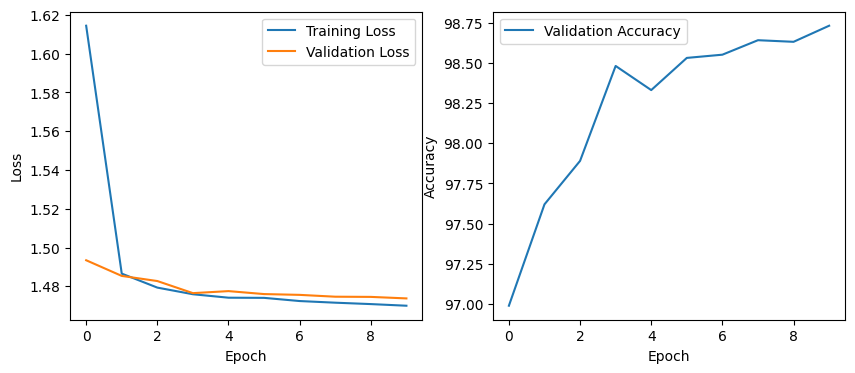

Average Test Accuracy: 98.94%


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

# Set random seed for reproducibility
torch.manual_seed(42)

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split trainset into train and validation sets
trainset, valset = torch.utils.data.random_split(trainset, [50000, 10000])

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 10)  # Output layer with 10 classes

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.softmax(x, dim=1)  # Apply softmax to the final layer

# Initialize the network
net = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_loss_history = []
val_loss_history = []
accuracy_history = []

for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss_history.append(running_loss / len(trainloader))

    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss_history.append(val_loss / len(valloader))
    accuracy = 100 * correct / total
    accuracy_history.append(accuracy)

# Plot the learning curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate the average prediction accuracy on the test set
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Average Test Accuracy: {test_accuracy:.2f}%")


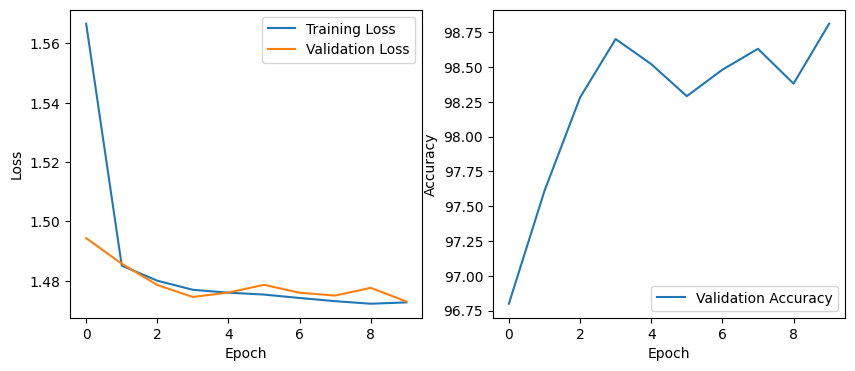

Average Test Accuracy: 98.78%


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split trainset into train and validation sets
trainset, valset = torch.utils.data.random_split(trainset, [50000, 10000])

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 10)
        self.relu = nn.ReLU()



    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.softmax(x, dim = 1)

        return x

# Initialize the network
net = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_loss_history = []
val_loss_history = []
accuracy_history = []

for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss_history.append(running_loss / len(trainloader))

    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss_history.append(val_loss / len(valloader))
    accuracy = 100 * correct / total
    accuracy_history.append(accuracy)

# Plot the learning curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate the average prediction accuracy on the test set
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Average Test Accuracy: {test_accuracy:.2f}%")


In [9]:
print(net.parameters)

<bound method Module.parameters of Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (relu): ReLU()
)>


In [10]:
# Calculate the total number of parameters in the network
total_params = sum(p.numel() for p in net.parameters())

# Calculate the number of parameters in the convolutional layers
conv_params = sum(p.numel() for name, p in net.named_parameters() if 'conv' in name)

# Calculate the number of parameters in the fully connected (dense) layers
fc_params = sum(p.numel() for name, p in net.named_parameters() if 'fc' in name)


print(f"Total Parameters: {total_params}")

print(f"Convolutional Parameters: {conv_params}")


print(f"Fully Connected Parameters: {fc_params}")


Total Parameters: 799206
Convolutional Parameters: 9568
Fully Connected Parameters: 789510


## 0.1 Visualizing the Convolutional Neural Network

In [16]:
kernels_1 = net.conv1.weight.detach().cpu().numpy()
kernels_1.shape

(32, 1, 3, 3)

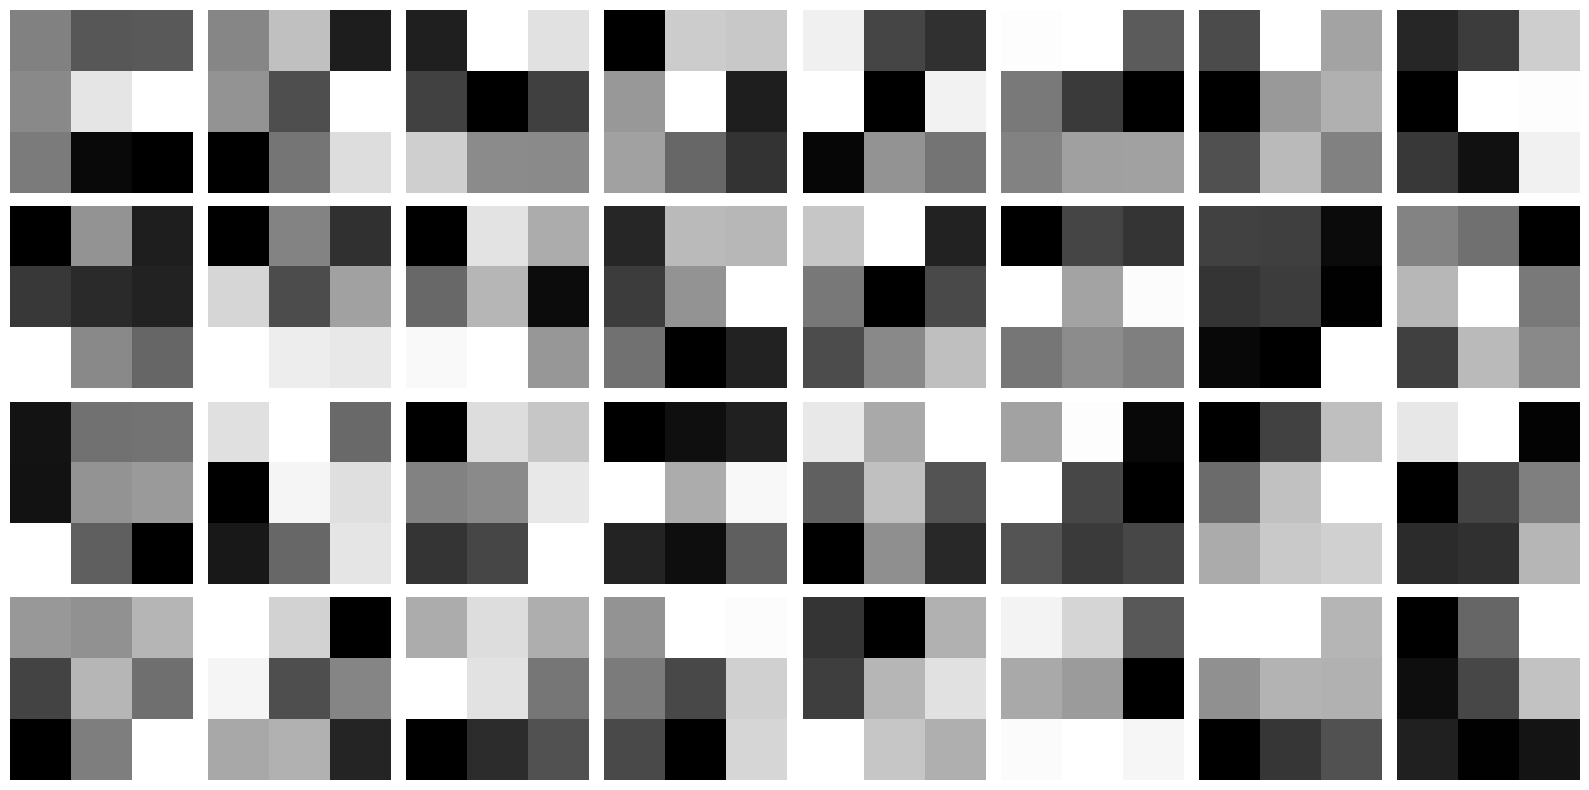

In [17]:
 images = kernels_1
# Create a 4x8 grid to display the images
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
axes = axes.flatten()

# Display each image in the grid
for i in range(32):
    ax = axes[i]
    ax.imshow(images[i, 0], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


**First Convolutional Layer**: This layer focuses on learning simple patterns like edges and curves in the input images.

**Second Convolutional Layer**: The activations in this layer start to combine simple patterns from the previous layer to detect more complex features like corners or combinations of edges.

In [25]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 10)
        self.relu = nn.ReLU()



    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.softmax(x, dim = 1)

        return x


    def visualize_activations(self, x):
        activation = {}  # Dictionary to store activations

        # Pass through the first convolutional layer and store its activation
        x = self.conv1(x)
        activation['conv1'] = x.detach()

        # Apply max-pooling and ReLU activation, and store the activation
        x = self.pool1(self.relu(x))
        activation['pool1'] = x.detach()

        # Pass through the second convolutional layer and store its activation
        x = self.conv2(x)
        activation['conv2'] = x.detach()

        # Apply max-pooling and ReLU activation, and store the activation
        x = self.pool2(self.relu(x))
        activation['pool2'] = x.detach()

        # Reshape the tensor for the fully connected layers
        x = x.view(-1, 32 * 7 * 7)

        # Pass through the first fully connected layer and store its activation
        x = torch.relu(self.fc1(x))
        activation['fc1'] = x.detach()

        # Pass through the second fully connected layer and store its activation
        x = self.fc2(x)
        activation['fc2'] = x.detach()

        return activation


In [26]:
#Check if a GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [22]:
train_loss_history = []
val_loss_history = []
accuracy_history = []
num_epochs = 10

for epoch in range(num_epochs):
    running_train_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    running_val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_loss_history.append(running_train_loss / len(trainloader))
    val_loss_history.append(running_val_loss / len(valloader))
    accuracy_history.append(100 * correct / total)

correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 97.91%


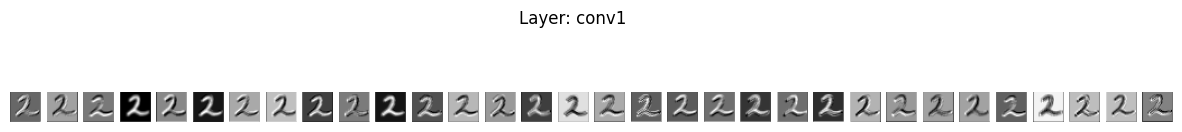

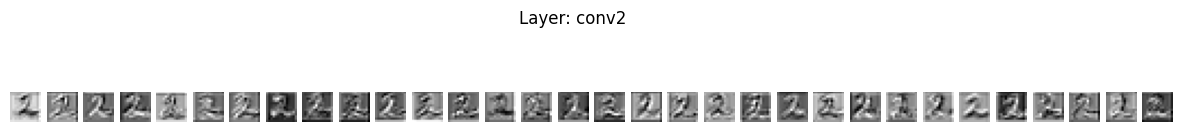

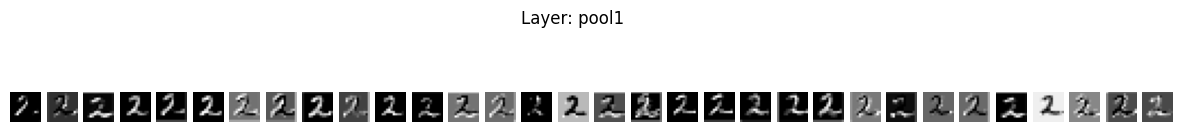

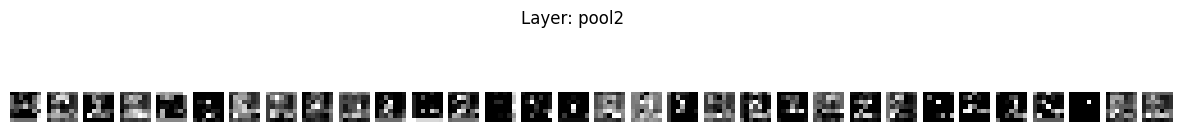

In [27]:
for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    activation_patterns = net.visualize_activations(images)
    break  # We break after the first batch to keep the example simple

# Plot activation patterns for selected layers
layers_to_visualize = ['conv1', 'conv2', 'pool1', 'pool2']

for layer in layers_to_visualize:
    activation = activation_patterns[layer]
    num_activations = activation.size(1)
    fig, axs = plt.subplots(1, num_activations, figsize=(15, 2))

    for i in range(num_activations):
        axs[i].imshow(activation[0, i].cpu(), cmap='gray')
        axs[i].axis('off')

    plt.suptitle(f'Layer: {layer}')
    plt.show()


In [28]:
import random

[38405, 26625, 3934, 37275, 1830]


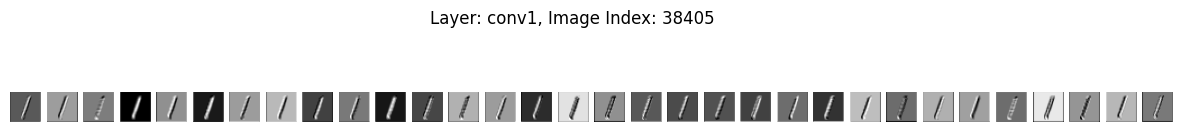

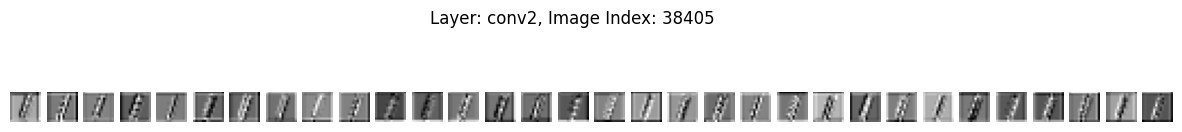

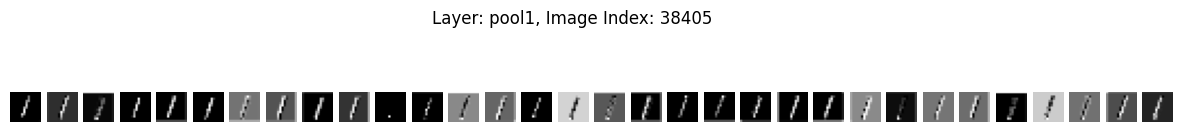

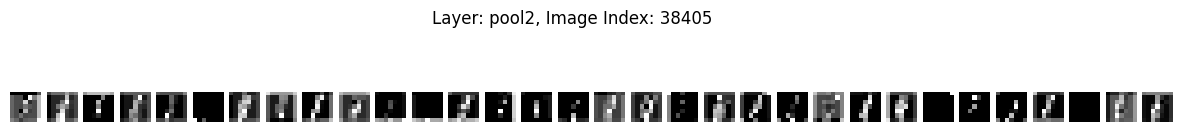

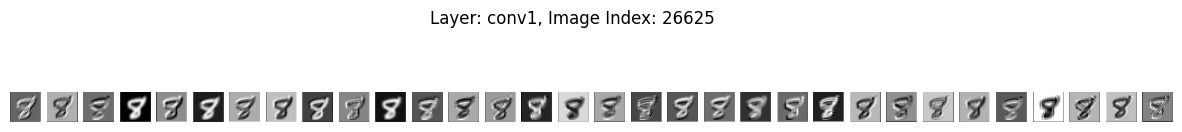

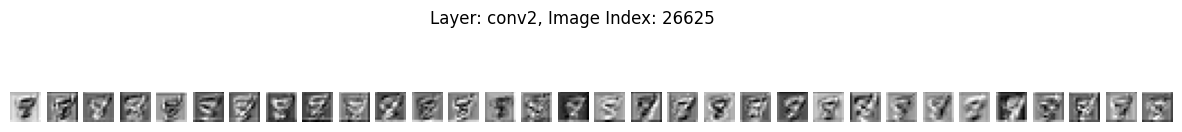

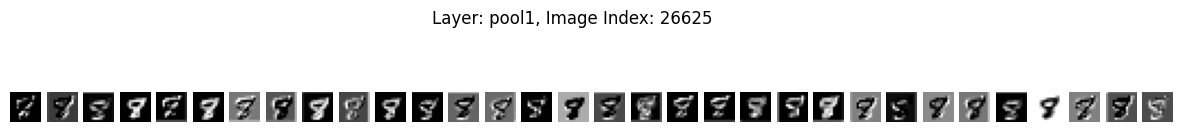

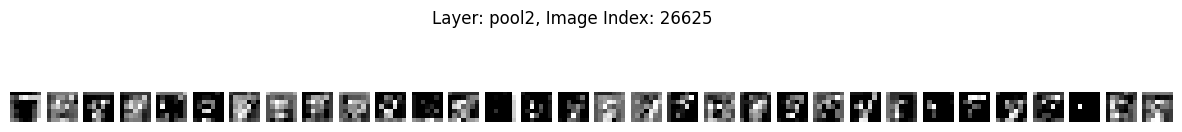

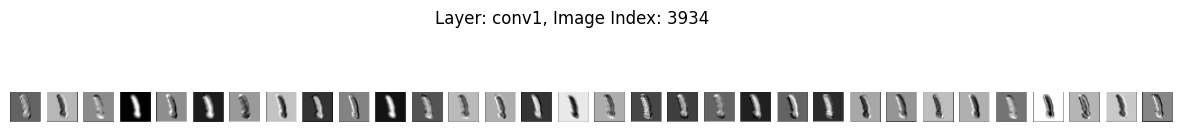

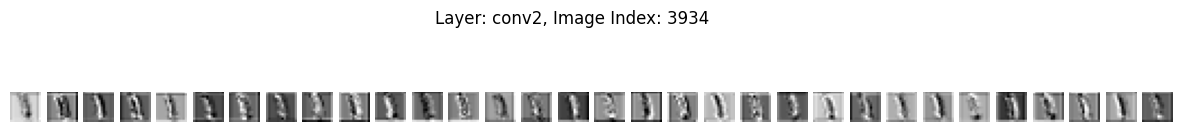

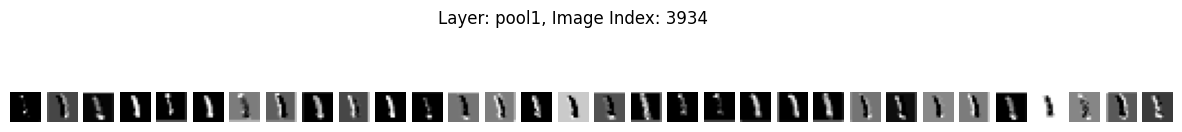

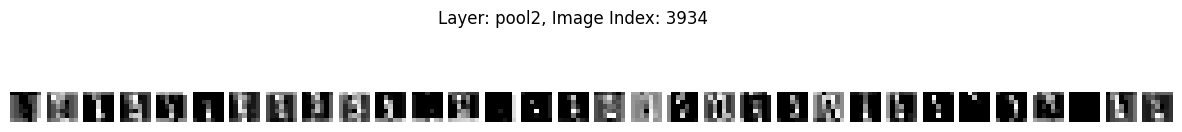

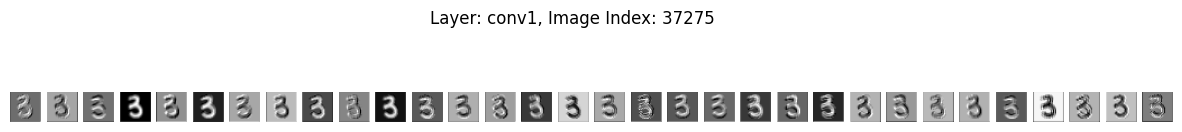

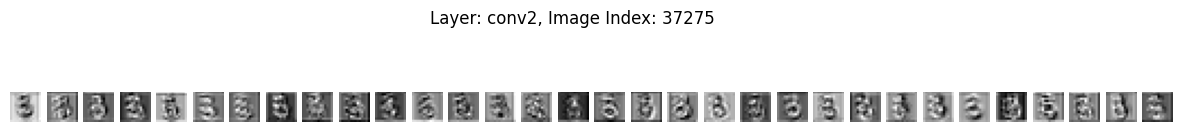

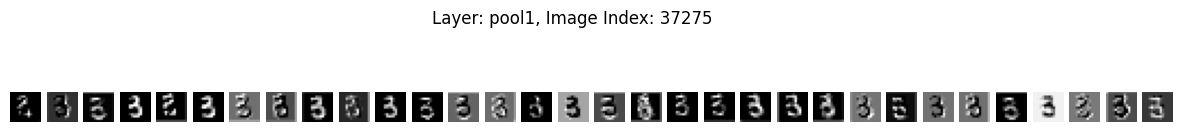

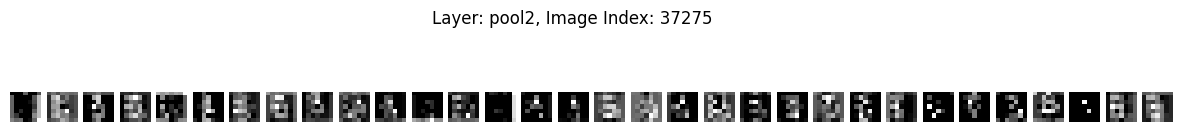

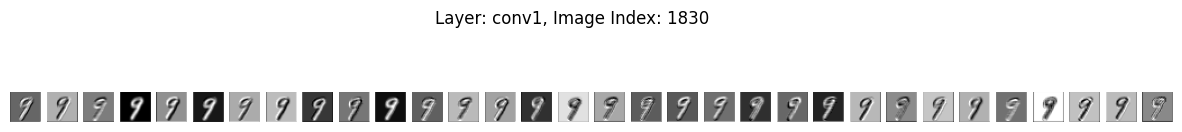

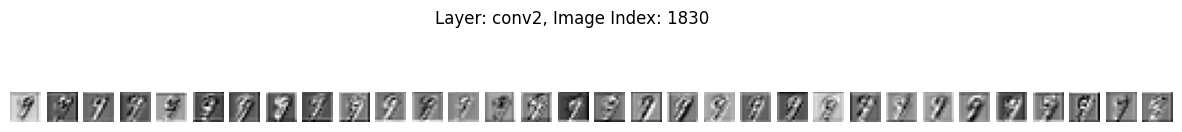

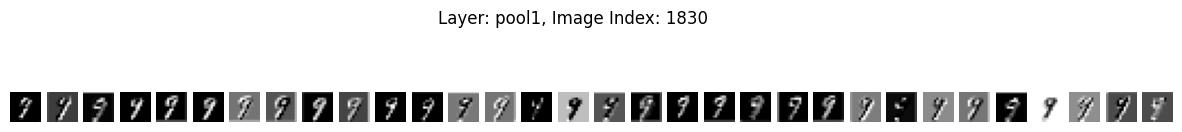

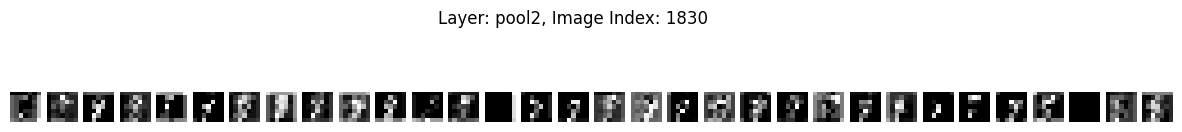

In [29]:
num_images_to_visualize = 5

# Get 3 random indices
random_indices = random.sample(range(len(trainset)), num_images_to_visualize)
print(random_indices)

for idx in random_indices:
    image, label = trainset[idx]
    image = image.unsqueeze(0)  # Add a batch dimension
    image = image.to(device)
    activation_patterns = net.visualize_activations(image)

    # Plot activation patterns for specific layers for the image
    layers_to_visualize = ['conv1', 'conv2', 'pool1', 'pool2']

    for layer in layers_to_visualize:
        activation = activation_patterns[layer]
        num_activations = activation.size(1)
        fig, axs = plt.subplots(1, num_activations, figsize=(15, 2))

        for i in range(num_activations):
            axs[i].imshow(activation[0, i].cpu(), cmap='gray')
            axs[i].axis('off')

        plt.suptitle(f'Layer: {layer}, Image Index: {idx}')
        plt.show()


In [30]:
import torch
import torch.nn.functional as F


In [31]:
def get_random_mnist_image(target_class):
    # Iterate through the dataset
    for data, labels in trainloader:
        for i in range(len(labels)):
            if labels[i] == target_class:
                return data[i], labels[i]


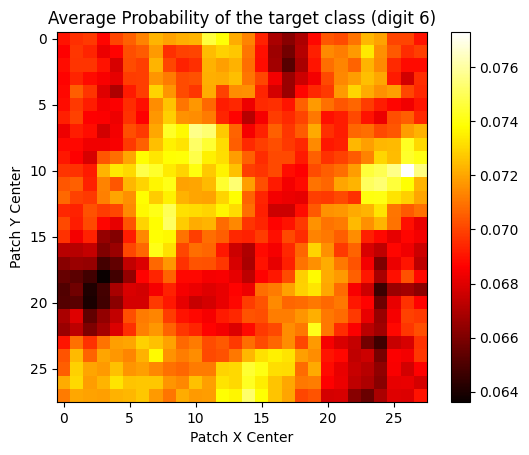

In [53]:
from torch.cuda import get_arch_list

def occlusion_experiment(model, image, target_class, patch_size=20):
    img_height, img_width = image.shape[2], image.shape[3]
    probs_grid = np.zeros((img_height, img_width))

    for i in range(img_height):
        for j in range(img_width):
            start_x = max(0, i - patch_size // 2)
            start_y = max(0, j - patch_size // 2)
            end_x = min(img_height, i + patch_size // 2 + 1)
            end_y = min(img_width, j + patch_size // 2 + 1)

            occluded_image = image.clone()
            occluded_image[:, :, start_x:end_x, start_y:end_y] = 0

            occluded_image = occluded_image.to(device)
            model = model.to(device)

            output = model(occluded_image)
            probs = torch.softmax(output, dim=1)[:, target_class].item()

            probs_grid[i, j] = probs

    return probs_grid

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_random_images = 10
target_class = 6
patch_size = 5
average_probs_grid = np.zeros((28, 28))

for _ in range(num_random_images):
    random_image = get_random_mnist_image(3)[0]
    random_image = random_image.unsqueeze(0).to(device)
    net = net.to(device)

    probs_grid = occlusion_experiment(net, random_image, target_class, patch_size)

    average_probs_grid += probs_grid

average_probs_grid /= num_random_images

plt.imshow(average_probs_grid, cmap='hot', interpolation='nearest')
plt.xlabel('Patch X Center')
plt.ylabel('Patch Y Center')
plt.title('Average Probability of the target class (digit {})'.format(target_class))
plt.colorbar()
plt.show()

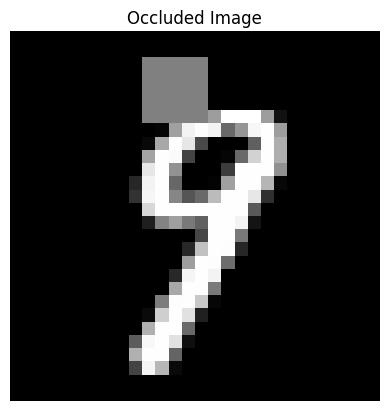

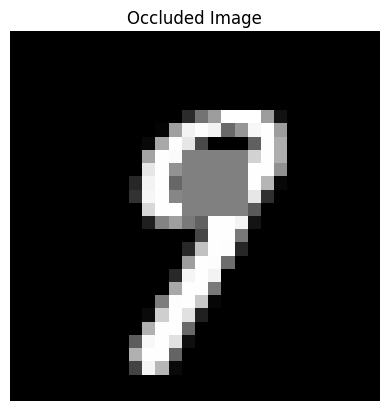

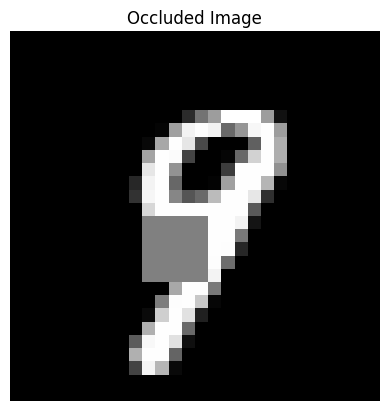

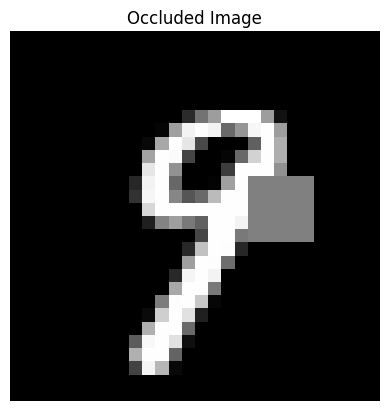

In [39]:
num_occluded_images = 4

for _ in range(num_occluded_images):
    i, j = np.random.randint(0, image.shape[2] - patch_size + 1), np.random.randint(0, image.shape[3] - patch_size + 1)
    occluded_image = image.clone()
    occluded_image[:, :, i:i+patch_size, j:j+patch_size] = 0

    plt.imshow(occluded_image.squeeze().cpu().numpy(), cmap='gray')
    plt.title('Occluded Image')
    plt.axis('off')
    plt.show()


In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 10)
        self.relu = nn.ReLU()



    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        #x = torch.softmax(x, dim = 1)

        return x

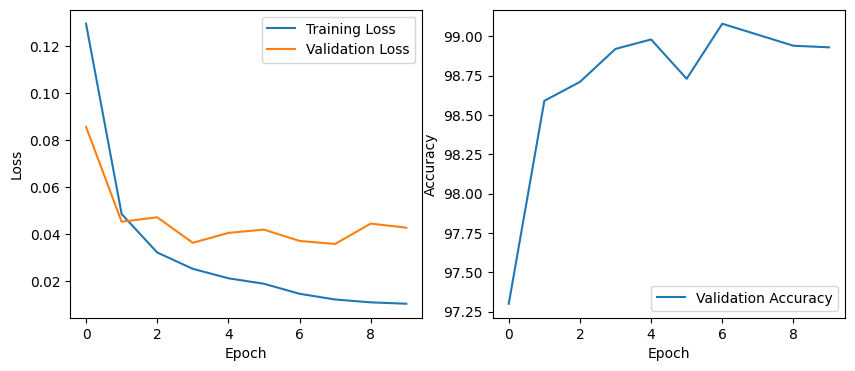

Average Test Accuracy: 99.12%


In [41]:
net = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_loss_history = []
val_loss_history = []
accuracy_history = []

for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss_history.append(running_loss / len(trainloader))

    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss_history.append(val_loss / len(valloader))
    accuracy = 100 * correct / total
    accuracy_history.append(accuracy)

# Plot the learning curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate the average prediction accuracy on the test set
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Average Test Accuracy: {test_accuracy:.2f}%")

## Non-Target Attack


tensor([[11415.0596, -9176.9551,   525.3217, -3309.2402, -5002.8569, -6818.9946,
          1323.5726, -8705.1309,   107.9110, -3401.9373]],
       grad_fn=<AddmmBackward0>)


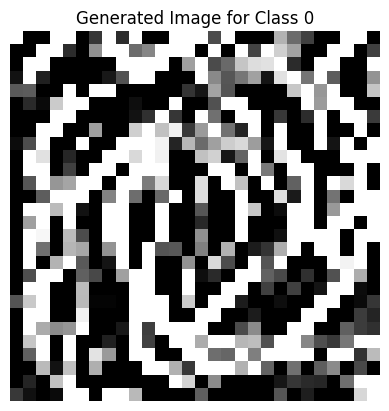

tensor([[-7844.7246,  8900.0469, -5055.7368, -5608.5869,  1024.7708, -1027.2679,
         -3048.1611,  -827.7138, -6268.1294, -6375.4819]],
       grad_fn=<AddmmBackward0>)


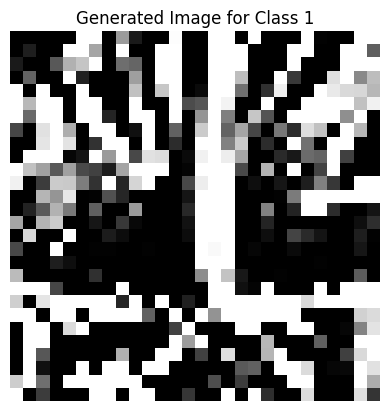

tensor([[   157.3335,  -6902.5439,  14664.7080,  -3874.1511,  -2246.0017,
         -10987.3857,  -6697.9526,  -7025.3975,   3415.2239,  -8431.2979]],
       grad_fn=<AddmmBackward0>)


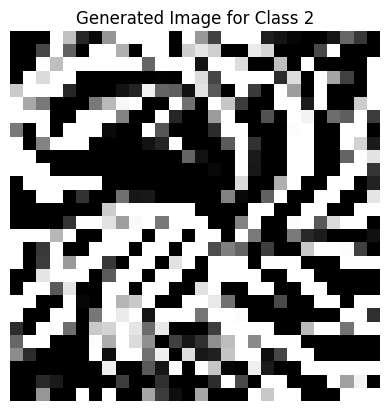

tensor([[-7755.8872, -4005.1135, -5446.2573, 13012.5176, -8955.1992, -2175.8887,
         -5705.4927, -4788.2871, -2008.2622, -5022.9766]],
       grad_fn=<AddmmBackward0>)


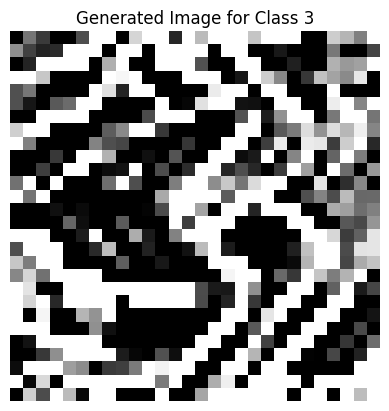

tensor([[ -7964.6665,    935.9916,  -1659.6974, -12994.2529,  13750.3486,
          -8866.6865,  -5923.8325,  -3957.0281,  -2252.0759,  -6540.4692]],
       grad_fn=<AddmmBackward0>)


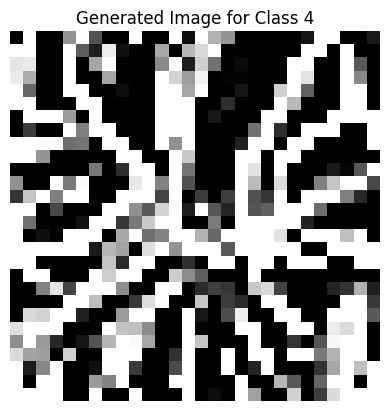

tensor([[-10421.5498,  -6154.4336, -15249.1689,  -3015.8059,  -5792.7095,
          12863.8564,  -2082.1172,  -8974.1045,   -772.7854,  -2197.5479]],
       grad_fn=<AddmmBackward0>)


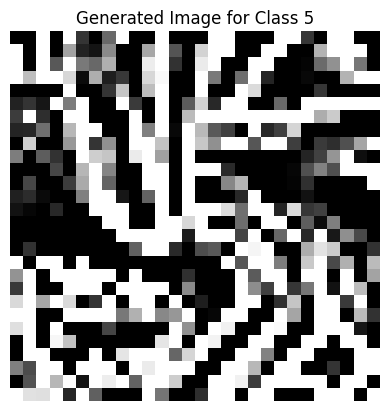

tensor([[  -541.1617,  -6671.0078,  -9093.5010,  -7812.8267,  -4174.5024,
           -678.7718,  11611.0205, -12059.1572,   1097.5933,  -8938.9062]],
       grad_fn=<AddmmBackward0>)


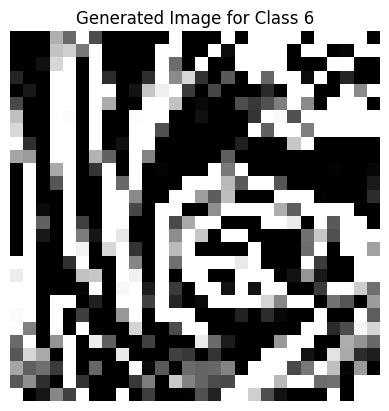

tensor([[-4121.2837,   132.9467, -4145.0630, -5712.0898,   366.6717, -5555.2700,
         -7062.6787, 11456.0693, -6370.1245, -5123.1118]],
       grad_fn=<AddmmBackward0>)


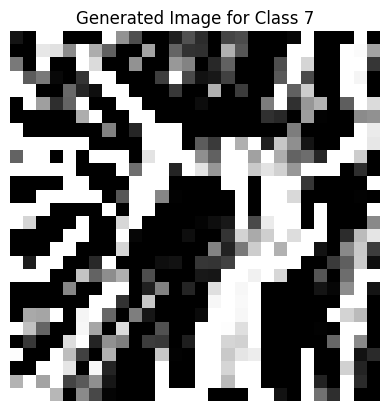

tensor([[ -2042.1045, -11283.2637,  -1702.5044,  -8113.5908,  -3293.3625,
          -5878.0420,  -3941.2795, -11689.0742,  15049.5312,  -3531.3428]],
       grad_fn=<AddmmBackward0>)


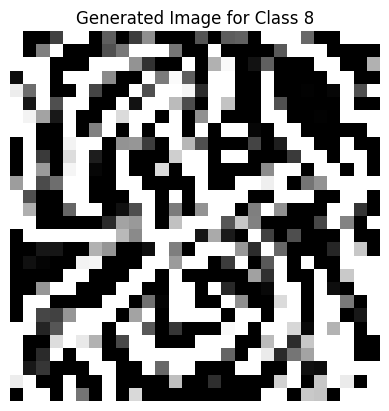

tensor([[ -5566.4355, -10602.9375,  -6067.6152,  -2142.0349,   1255.9736,
          -3854.3120, -10456.2568,  -4523.1123,  -1077.4236,  10496.1465]],
       grad_fn=<AddmmBackward0>)


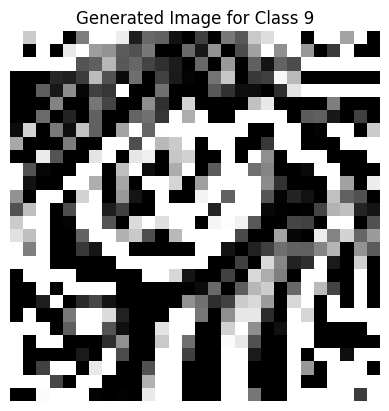

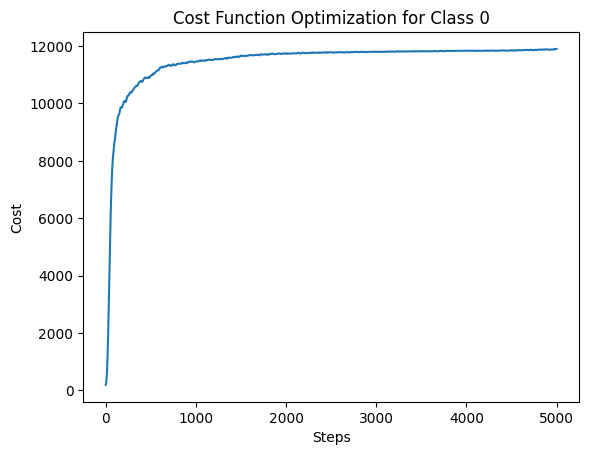

In [42]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn as nn

# Function to generate an image for a target class
def generate_image(model, target_class, step_size=2, num_steps=10000, device=torch.device('cpu')):
    # Initialize noise matrix X with Gaussian noise centered around 128
    random_image = torch.randn(1, 1, 28, 28, device=device) * 10 + 128.0
    random_image.requires_grad = True

    # Move the model to the specified device
    model = model.to(device)

    # Optimize to maximize the probability of the target class
    for i in range(num_steps):
        output = model(random_image)
        cost = output[0, target_class]  # Cost function
        cost.backward()  # Backpropagate to get the gradients
        random_image.data = random_image.data + step_size * random_image.grad.sign()  # Gradient ascent step
        # Clip the image values to be within a valid range (0-255)
        random_image.data = torch.clamp(random_image.data, 0, 255)
    print(output)
    return random_image.detach().squeeze()

# Function to plot the cost function during optimization
def plot_cost_function(model, target_class, step_size=1, num_steps=5000, device=torch.device('cpu')):
    random_image = torch.randn(1, 1, 28, 28, device=device) * 10 + 128.0
    random_image.requires_grad = True

    # Move the model to the specified device
    model = model.to(device)

    costs = []  # Store the cost at each step
    for i in range(num_steps):
        output = model(random_image)
        cost = output[0, target_class]  # Cost function
        cost.backward()  # Backpropagate to get the gradients
        random_image.data = random_image.data + step_size * random_image.grad  # Gradient ascent step
        # Clip the image values to be within a valid range (0-255)
        random_image.data = torch.clamp(random_image.data, 0, 255)
        # Store the cost for this step
        costs.append(cost.item())

    # Plot the cost function
    plt.plot(range(num_steps), costs)
    plt.xlabel('Steps')
    plt.ylabel('Cost')
    plt.title('Cost Function Optimization for Class {}'.format(target_class))
    plt.show()

# Generate images for each MNIST class and plot them
for target_class in range(0,10):

    generated_image = generate_image(net, target_class, device=device)

    plt.imshow(generated_image.cpu().numpy(), cmap='gray')
    plt.title('Generated Image for Class {}'.format(target_class))
    plt.axis('off')
    plt.show()


# Plot the cost function for a target class
target_class_to_plot = 0  # Change this to plot for a different target class
plot_cost_function(net, target_class_to_plot, device=device)


Targeted attack with target as class Two


In [43]:
def get_random_mnist_image_of_class(target_class):
    # Iterate through the dataset
    for data, labels in trainloader:
        for i in range(len(labels)):
            if labels[i] == target_class:
                return data[i], labels[i]

In [49]:
device = torch.device('cpu')

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim

# Function to generate an adversarial image for a target class
def generate_adversarial_image(model, target_class, target_image, beta, step_size=1.0, num_steps=1000, device=torch.device('cpu')):
    X = torch.randn(1, 1, 28, 28, device=device) * 10 + 128.0
    X.requires_grad = True
    model = model.to(device)
    target_image = target_image.to(device)
    target_costs = []
    target_probabilities = []
    optimizer = optim.Adam([X], lr=step_size)

    for i in range(num_steps):
        output = model(X)
        logits = output[0]
        target_prob = logits[target_class]
        mse_loss = nn.functional.mse_loss(X, target_image)
        cost = -(target_prob - beta * mse_loss)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        X.data = torch.clamp(X.data, 0, 255)
        target_costs.append(beta * mse_loss.detach().cpu())
        target_probabilities.append(target_prob.detach().cpu())

    return X.detach().squeeze(), target_costs, target_probabilities

# Function to generate adversarial images for all MNIST classes
def generate_adversarial_images_for_mnist_classes(model, target_images, beta, step_size=1.0, num_steps=1000, device=torch.device('cpu')):
    num_classes = len(target_images)
    generated_images = []
    target_probabilities_l = []
    target_costs_l = []

    for target_class, target_image in enumerate(target_images):
        adversarial_image, target_costs, target_probabilities = generate_adversarial_image(model, target_class, target_image, beta, step_size, num_steps, device)
        generated_images.append(adversarial_image)
        target_probabilities_l.append(target_probabilities)
        target_costs_l.append(target_costs)

    return generated_images, target_probabilities_l, target_costs_l

# Instantiate the model (assuming "net" is already defined)
model = net

# Generate target images for each MNIST class
target_images_tensor = []  # Populate this with preprocessed target images for each class

for i in range(10):  # Generate target images for each class
    image, _ = get_random_mnist_image_of_class(i)
    target_images_tensor.append(image.unsqueeze(0))

beta = 0.001  # Adjust beta according to the desired output

# Generate adversarial images and their probabilities
generated_images, target_probabilities, target_costs = generate_adversarial_images_for_mnist_classes(model, target_images_tensor, beta)


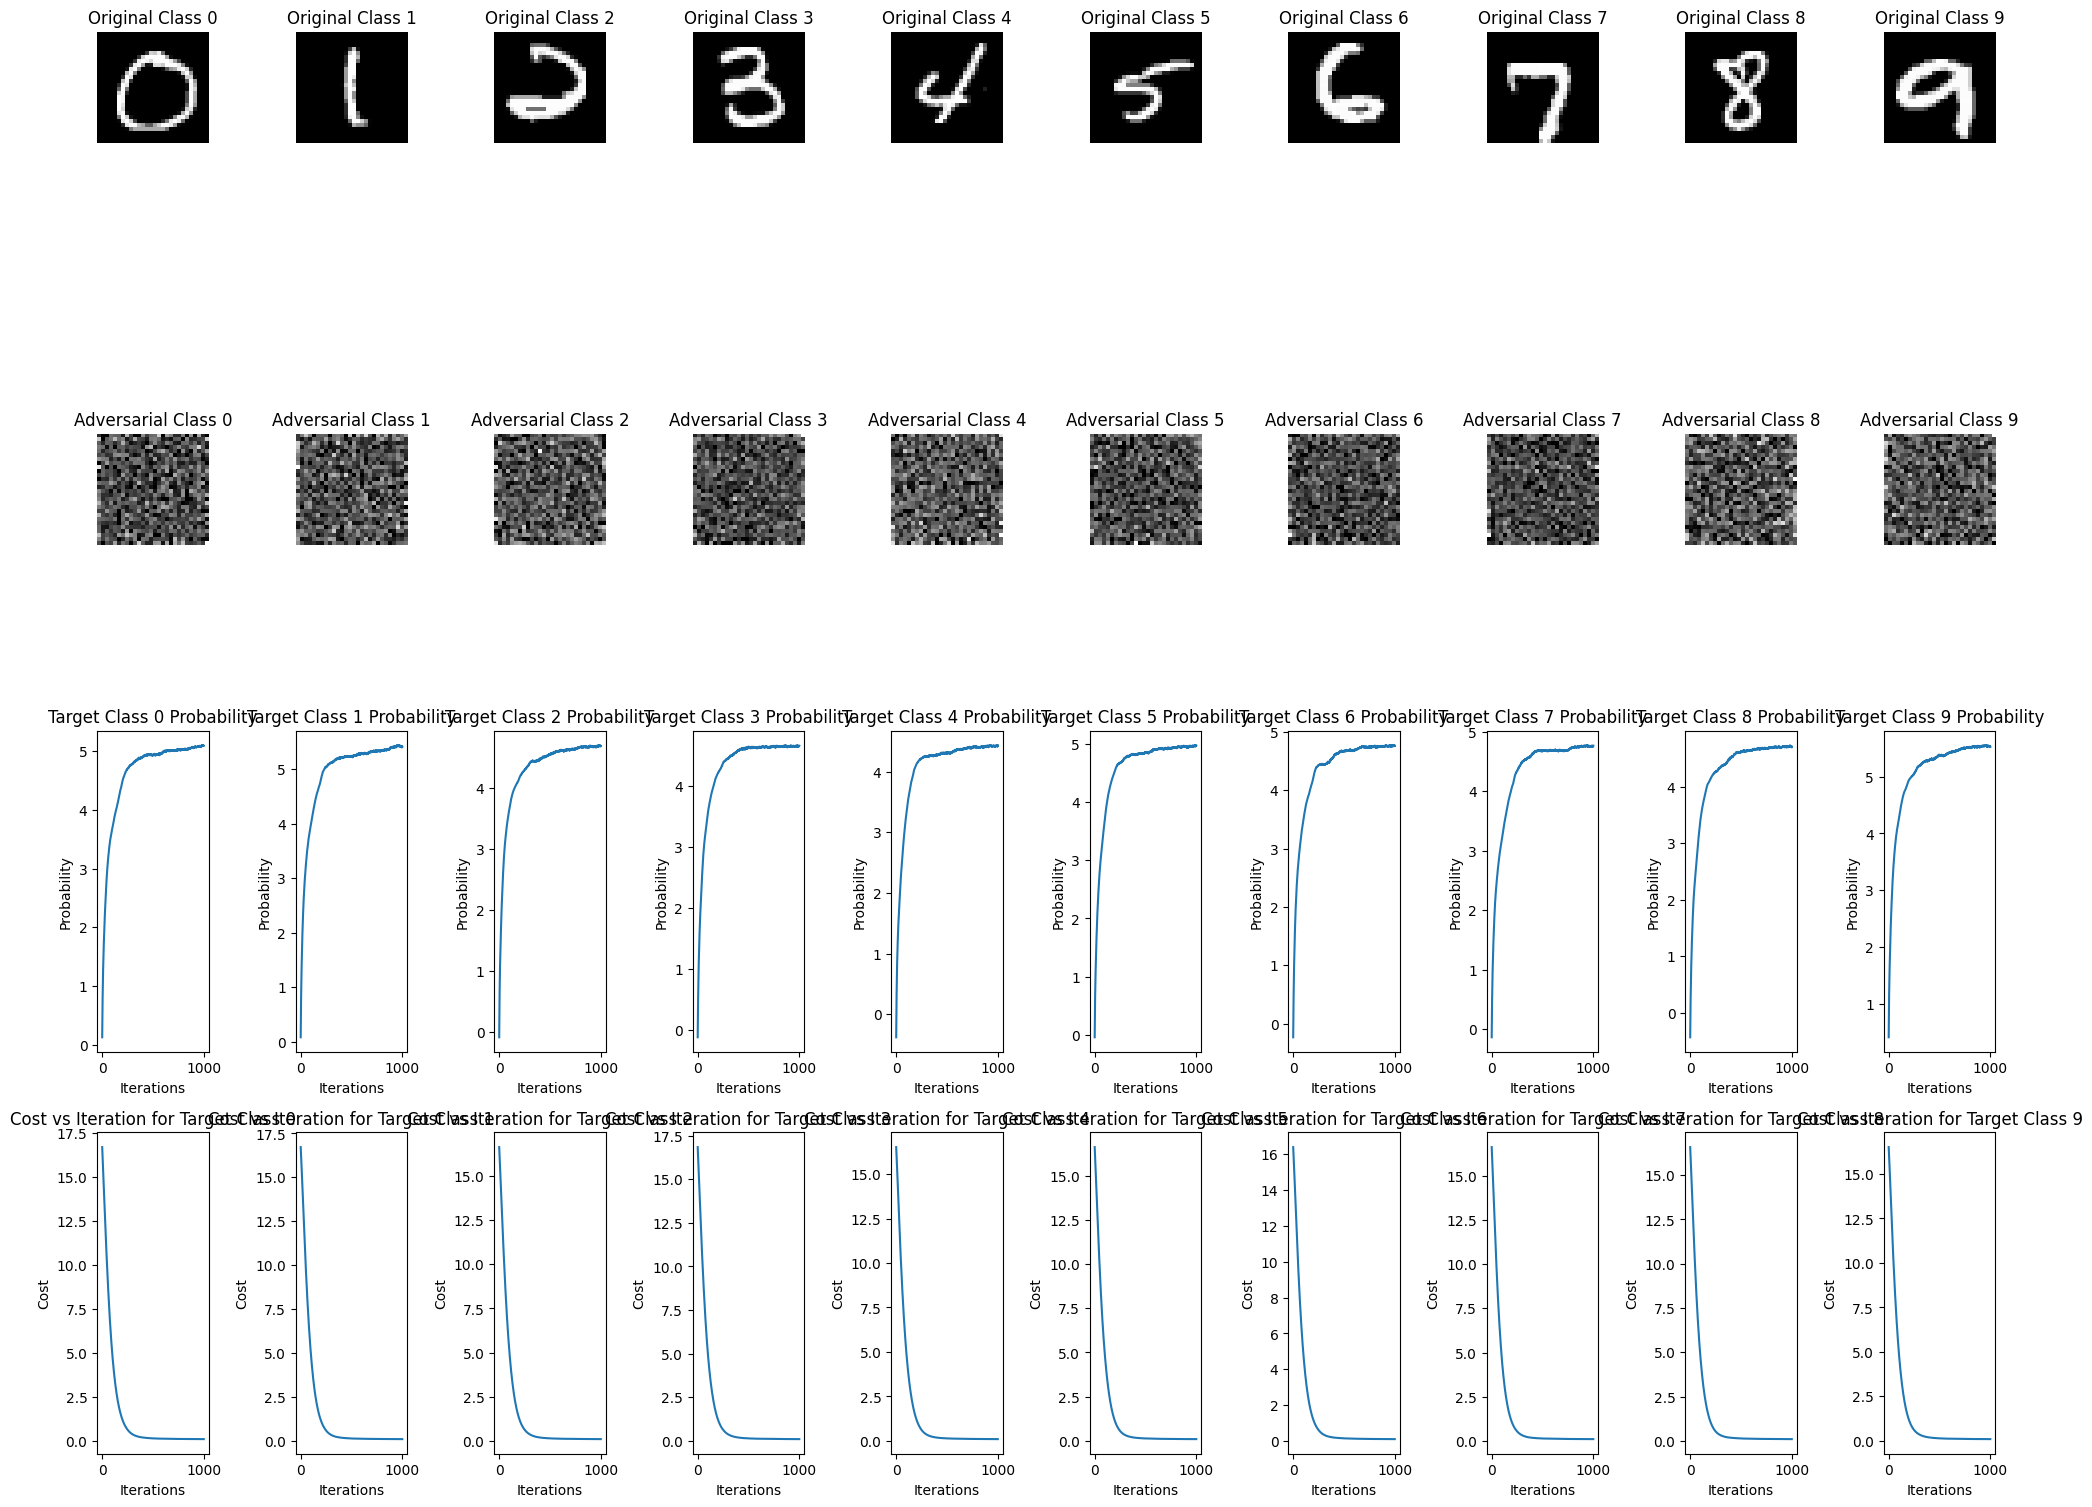

In [52]:
plt.figure(figsize=(20, 16))  # Adjusted the figsize for 4 rows and 10 columns
for i in range(10):
    # Plot original MNIST image
    plt.subplot(4, 10, i + 1)
    plt.imshow(target_images_tensor[i].cpu().numpy().squeeze(), cmap='gray')
    plt.title(f'Original Class {i}', fontsize=12)
    plt.axis('off')

    # Plot generated adversarial image
    plt.subplot(4, 10, i + 11)
    plt.imshow(generated_images[i].cpu().numpy().squeeze(), cmap='gray')
    plt.title(f'Adversarial Class {i}', fontsize=12)
    plt.axis('off')

    # Plot target class probabilities
    plt.subplot(4, 10, i + 21)
    plt.plot(target_probabilities[i])
    plt.xlabel('Iterations', fontsize=10)
    plt.ylabel('Probability', fontsize=10)
    plt.title(f'Target Class {i} Probability', fontsize=12)

    # Plot cost vs iteration
    plt.subplot(4, 10, i + 31)
    plt.plot(target_costs[i])
    plt.xlabel('Iterations', fontsize=10)
    plt.ylabel('Cost', fontsize=10)
    plt.title(f'Cost vs Iteration for Target Class {i}', fontsize=12)

plt.tight_layout()
plt.show()
